# Social Cops Assignment

In [294]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [295]:
df_mon = pd.read_csv("/home/viserion/Downloads/Monthly_data_cmo.csv")
df_mon.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [296]:
df_crop=pd.read_csv("/home/viserion/Downloads/CMO_MSP_Mandi.csv")
df_crop.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


In [297]:
df_mon.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [298]:
df_crop.describe()

,year,msprice,msp_filter
count,155.000000,145.000000,155.0
mean,2014.000000,2822.448276,1.0
std,1.418798,1441.725928,0.0
min,2012.000000,170.000000,1.0
25%,2013.000000,1470.000000,1.0
50%,2014.000000,2970.000000,1.0
75%,2015.000000,4000.000000,1.0
max,2016.000000,6240.000000,1.0


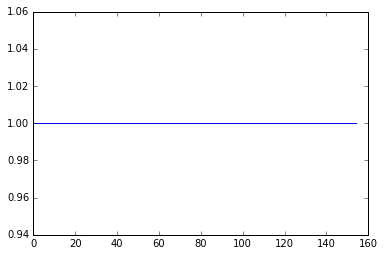

In [299]:
plt.plot(df_crop['msp_filter'])

In [300]:
#implies all values in msp_filter are 1...no need of that coloumn
ms_filter=1.0
del df_crop['msp_filter']
df_crop.head()

,commodity,year,Type,msprice
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0
2,Jowar_Hybrid,2012,Kharif Crops,1500.0
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0
4,BAJRI,2012,Kharif Crops,1175.0


In [301]:
df_mon.isnull().sum()

APMC               0
Commodity          0
Year               0
Month              0
arrivals_in_qtl    0
min_price          0
max_price          0
modal_price        0
date               0
district_name      0
state_name         0
dtype: int64

In [302]:
df_crop.isnull().sum()

commodity     0
year          0
Type          0
msprice      10
dtype: int64

In [303]:
df_crop['msprice'] = df_crop.groupby('commodity')['msprice'].transform(lambda x: x.fillna(x.mean()))

In [304]:
df_crop.isnull().sum()

commodity    0
year         0
Type         0
msprice      0
dtype: int64

In [305]:
df_crop.head(10)

,commodity,year,Type,msprice
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0
2,Jowar_Hybrid,2012,Kharif Crops,1500.0
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0
4,BAJRI,2012,Kharif Crops,1175.0
5,MAIZE,2012,Kharif Crops,1175.0
6,Ragi_Maldandi,2012,Kharif Crops,1500.0
7,PIGEON PEA (TUR),2012,Kharif Crops,3850.0
8,SPILT GERRN GRAM,2012,Kharif Crops,4400.0
9,SPLIT BLACK GRAM,2012,Kharif Crops,4300.0


# Note: we don't have 10 ms_prices 

In [307]:
df_c=df_crop.groupby('commodity')

In [308]:
df_c.describe()

year                                             \
                       count    mean       std     min      25%     50%   
commodity                                                                 
BAJRI                    5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
BARLI                    5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
COCONUT                  5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
COTTON                   5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
Copra (Ball)_Yellow      5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
Copra (Milling)_Yellow   5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
Cotton_Long Staple       5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
GR.NUT KERNELS           5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
Gram_Yellow              5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
Jowar_Hybrid             5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
Jute_Yellow              5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
MAIZE                    5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
MUSTARD                  5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
Masur_Yellow             5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
NIGER-SEED               5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
PADDY-UNHUSKED           5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
PIGEON PEA (TUR)         5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
RICE(PADDY-HUS)          5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
Ragi_Maldandi            5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
SAFFLOWER                5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
SESAMUM                  5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
SORGUM(JAWAR)            5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
SOYABEAN                 5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
SPILT GERRN GRAM         5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
SPLIT BLACK GRAM         5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
SUGAR-CANE               4.0  2013.5  1.290994  2012.0  2012.75  2013.5   
SUGARCANE                1.0  2016.0       NaN  2016.0  2016.00  2016.0   
SUNFLOWER                5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
Soyabean_Black           5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
Toria_Yellow             5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
WHEAT(HUSKED)            5.0  2014.0  1.581139  2012.0  2013.00  2014.0   
WHEAT(UNHUSKED)          5.0  2014.0  1.581139  2012.0  2013.00  2014.0   

                                        msprice                               \
                            75%     max   count     mean         std     min   
commodity                                                                      
BAJRI                   2015.00  2016.0     5.0  1268.00   60.477268  1175.0   
BARLI                   2015.00  2016.0     5.0  1113.75   89.118951   980.0   
COCONUT                 2015.00  2016.0     5.0  1470.00   81.777136  1400.0   
COTTON                  2015.00  2016.0     5.0  3742.00   99.095913  3600.0   
Copra (Ball)_Yellow     2015.00  2016.0     5.0  5684.00  356.973388  5350.0   
Copra (Milling)_Yellow  2015.00  2016.0     5.0  5420.00  338.378486  5100.0   
Cotton_Long Staple      2015.00  2016.0     5.0  4042.00   99.095913  3900.0   
GR.NUT KERNELS          2015.00  2016.0     5.0  3970.00  158.745079  3700.0   
Gram_Yellow             2015.00  2016.0     5.0  3175.00  157.122564  3000.0   
Jowar_Hybrid            2015.00  2016.0     5.0  1545.00   53.150729  1500.0   
Jute_Yellow             2015.00  2016.0     5.0  2560.00  403.732585  2200.0   
MAIZE                   2015.00  2016.0     5.0  1297.00   71.815736  1175.0   
MUSTARD                 2015.00  2016.0     5.0  3125.00  134.629120  3000.0   
Masur_Yellow            2015.00  2016.0     5.0  3062.50  164.411830  2900.0   
NIGER-SEED              2015.00  2016.

In [309]:
df_mon['Commodity']= df_mon['Commodity'].str.lower()

In [310]:
df_crop['commodity']=df_crop['commodity'].str.lower()

In [311]:
df_crop.rename(columns={'commodity':'Commodity',
                          'year':'Year'}, 
                 inplace=True)

In [312]:
df_crop.head()

,Commodity,Year,Type,msprice
0,paddy-unhusked,2012,Kharif Crops,1250.0
1,rice(paddy-hus),2012,Kharif Crops,1280.0
2,jowar_hybrid,2012,Kharif Crops,1500.0
3,sorgum(jawar),2012,Kharif Crops,1520.0
4,bajri,2012,Kharif Crops,1175.0


Now I will use standard statistic technique to remove outliers based upon a commodity in an particular year. We will remove all values in a particular year of a particular commodity if it is less than Q1-1.5 IQR or more than Q3+1.5 IQR

In [313]:
df_mon.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,wheat(husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,wheat(husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,sorgum(jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


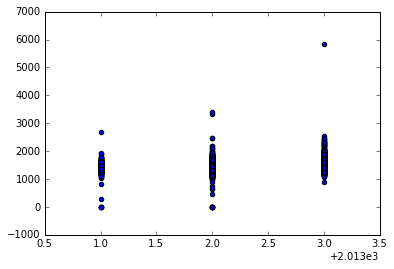

In [314]:
df_col=df_mon.groupby('Commodity')
plt.scatter(y=df_col.get_group('bajri')['modal_price'], x=df_col.get_group('bajri')['Year'])

In [315]:
df_mon=df_mon[df_mon.groupby(['Commodity', 'Year']).modal_price.transform(lambda x : (x<2.5*x.quantile(0.75)-1.5*x.quantile(0.25))&(x>(2.5*x.quantile(0.25)-1.5*x.quantile(0.75)))).eq(1)]

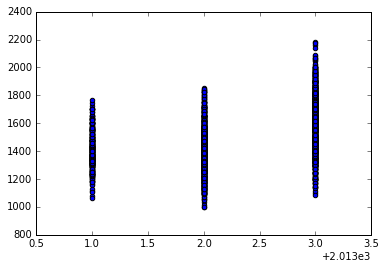

In [316]:
df_colu=df_mon.groupby('Commodity')
plt.scatter(y=df_colu.get_group('bajri')['modal_price'], x=df_colu.get_group('bajri')['Year'])

In [318]:
dfinal= df_mon.merge(df_crop, on=['Commodity', 'Year'], how='outer')

In [319]:
dfinal.drop(dfinal.index[60323:], inplace=True)

In [321]:
dfinal['msprice'] = dfinal.groupby('Year').transform(lambda x: x.fillna(x.mean()))['msprice']

In [322]:
dfinal['Type'].fillna("Kharif Crops", inplace=True)

In [325]:
df_mon.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,wheat(husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,wheat(husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,sorgum(jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra



# TASK 2
Detect seasonality type (multiplicative or additive) for each cluster of APMC and commodities
And find deseasonalized prices

In [124]:
df_apmc = df_mon.groupby('APMC') 
df_apmc.describe()

Year                                          \
                                count         mean       std     min      25%   
APMC                                                                            
Aamgaon                          27.0  2015.259259  0.712125  2014.0  2015.00   
Aarni                            83.0  2015.240964  0.691241  2014.0  2015.00   
Achalpur                        193.0  2015.264249  0.755271  2014.0  2015.00   
Aheri                           205.0  2015.321951  0.688673  2014.0  2015.00   
Ahmednagar                      625.0  2015.515200  0.546119  2014.0  2015.00   
Ahmedpur                        280.0  2015.389286  0.662806  2014.0  2015.00   
Akhadabalapur                   162.0  2015.259259  0.683029  2014.0  2015.00   
Akkalkuwa                        27.0  2015.444444  0.506370  2015.0  2015.00   
Akkolkot                        100.0  2015.260000  0.719427  2014.0  2015.00   
Akluj                           523.0  2015.227533  0.700196  2014.0  2015.00   
Akola                           239.0  2015.384937  0.643604  2014.0  2015.00   
Akole                           175.0  2015.262857  0.694430  2014.0  2015.00   
Akot                            194.0  2015.567010  0.496771  2015.0  2015.00   
Alibag                           55.0  2015.509091  0.634581  2014.0  2015.00   
Amalner                         206.0  2015.470874  0.716786  2014.0  2015.00   
Amarawati                       792.0  2015.525253  0.577162  2014.0  2015.00   
Amarawati-Fruit And Vegetables  281.0  2016.000000  0.000000  2016.0  2016.00   
Ambad(Vadi Godri)               100.0  2015.400000  0.696311  2014.0  2015.00   
Ambejogai                       199.0  2015.080402  0.727225  2014.0  2015.00   
Anajngaon Surji                 230.0  2015.213043  0.713442  2014.0  2015.00   
Arjuni Morgaon                   27.0  2015.259259  0.712125  2014.0  2015.00   
Armori                           38.0  2015.315789  0.661908  2014.0  2015.00   
Armori-Desaiganj                 41.0  2015.268293  0.707969  2014.0  2015.00   
Arvi                             70.0  2015.342857  0.634417  2014.0  2015.00   
Ashti (Jalna)                    36.0  2015.388889  0.494413  2015.0  2015.00   
Ashti (Wardha)                   10.0  2015.700000  0.483046  2015.0  2015.25   
Ashti-Karanja                    41.0  2015.609756  0.542128  2014.0  2015.00   
Atpadi                           59.0  2015.271186  0.761815  2014.0  2015.00   
Aurad Shahajani                  35.0  2015.828571  0.382385  2015.0  2016.00   
Aurangabad                      908.0  2015.223568  0.718027  2014.0  2015.00   
...                               ...          ...       ...     ...      ...   
Tiwasa                            4.0  2015.750000  0.500000  2015.0  2015.75   
Tuljapur                        186.0  2015.172043  0.683768  2014.0  2015.00   
Tumsar                          271.0  2015.339483  0.722053  2014.0  2015.00   
Udgir                           173.0  2015.236994  0.687442  2014.0  2015.00   
Ulhasnagar                      104.0  2015.923077  0.267760  2015.0  2016.00   
Umared                          364.0  2015.258242  0.683786  2014.0  2015.00   
Umarga                          305.0  2015.134426  0.705916  2014.0  2015.00   
Umari                            31.0  2015.870968  0.340777  2015.0  2016.00   
Umarkhed                        102.0  2015.245098  0.681238  2014.0  2015.00   
Umarkhed-Danki                   94.0  2015.244681  0.682912  2014.0  2015.00   
Umrane                           13.0  2015.846154  0.375534  2015.0  2016.00   
Vadgaon Peth                    410.0  2015.256098  0.713320  2014.0  2015.00   
Vaduj                           190.0  2015.284211  0.715115  2014.0  2015.00   
Vadvani                           4.0  2016.000000  0.000000  2016.0  2016.00   
Vai                             348.0  2015.310345  0.684288  2014.0  2015.00   
Vaijapur                        332.0  2015.397590  0.707145  20

In [326]:
from datetime import datetime
df_seasonal=df_mon
df_seasonal['date'] = pd.to_datetime(df_seasonal['date'])
df_seasonal.index = df_seasonal['date']
del df_seasonal['date']
df_seasonal.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,district_name,state_name
date,,,,,,,,,,
2015-04-01,Ahmednagar,bajri,2015,April,79,1406,1538,1463,Ahmadnagar,Maharashtra
2016-04-01,Ahmednagar,bajri,2016,April,106,1788,1925,1875,Ahmadnagar,Maharashtra
2015-04-01,Ahmednagar,wheat(husked),2015,April,1253,1572,1890,1731,Ahmadnagar,Maharashtra
2016-04-01,Ahmednagar,wheat(husked),2016,April,387,1750,2220,1999,Ahmadnagar,Maharashtra
2015-04-01,Ahmednagar,sorgum(jawar),2015,April,3825,1600,2200,1900,Ahmadnagar,Maharashtra


In [329]:
df_seasonal.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,60323.000000,6.032300e+04,6.032300e+04,60323.000000,60323.000000
mean,2015.343186,5.979891e+03,2.917313e+03,3610.827346,3253.333090
std,0.687594,3.424404e+04,1.338603e+04,4112.467709,3484.555751
min,2014.000000,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,2015.000000,3.900000e+01,1.238000e+03,1590.000000,1445.000000
50%,2015.000000,2.160000e+02,1.928000e+03,2756.000000,2388.000000
75%,2016.000000,1.374000e+03,3.882000e+03,4600.000000,4230.000000
max,2016.000000,1.450254e+06,3.153038e+06,174375.000000,142344.000000


In [330]:
from datetime import datetime
df_season=dfinal
df_season['date'] = pd.to_datetime(df_season['date'])
df_season.index = df_season['date']
del df_season['date']
df_seasonal.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,district_name,state_name
date,,,,,,,,,,
2015-04-01,Ahmednagar,bajri,2015,April,79,1406,1538,1463,Ahmadnagar,Maharashtra
2016-04-01,Ahmednagar,bajri,2016,April,106,1788,1925,1875,Ahmadnagar,Maharashtra
2015-04-01,Ahmednagar,wheat(husked),2015,April,1253,1572,1890,1731,Ahmadnagar,Maharashtra
2016-04-01,Ahmednagar,wheat(husked),2016,April,387,1750,2220,1999,Ahmadnagar,Maharashtra
2015-04-01,Ahmednagar,sorgum(jawar),2015,April,3825,1600,2200,1900,Ahmadnagar,Maharashtra


In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose

('Seasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7f5c16310710>)


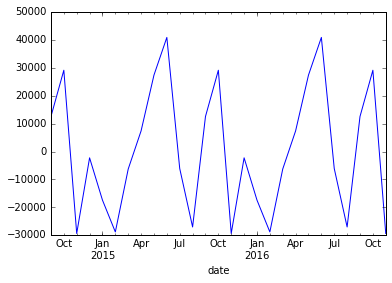

In [344]:
result = seasonal_decompose(df_season.query('APMC == "Mumbai"').groupby("date").sum().modal_price, model='additive', freq=12)
res=df_season.query('APMC == "Mumbai"').groupby("date").sum().msprice
print("Seasonality: ",result.seasonal.plot())

('Observed: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7f5c168dee90>)


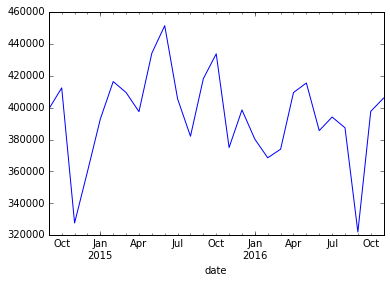

In [345]:
print("Observed: ",result.observed.plot())

('Residual: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7f5c168ecd90>)


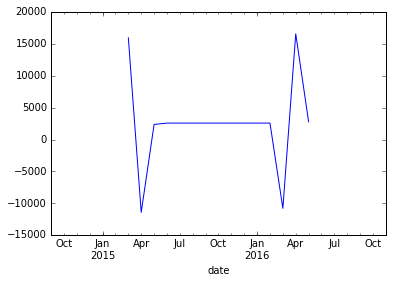

In [346]:
 print("Residual: ", result.resid.plot())

('Trend: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7f5c167e3790>)


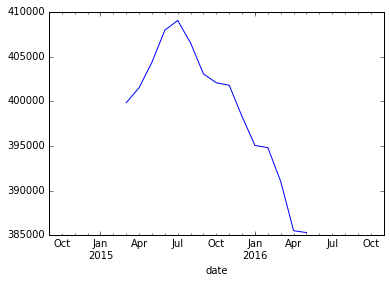

In [347]:
 print("Trend: ", result.trend.plot())

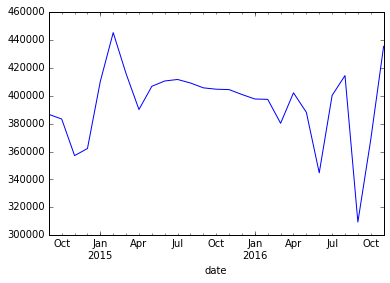

In [348]:
resadd= result.observed - result.seasonal

resadd.plot()

('Seasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7f5c16632710>)


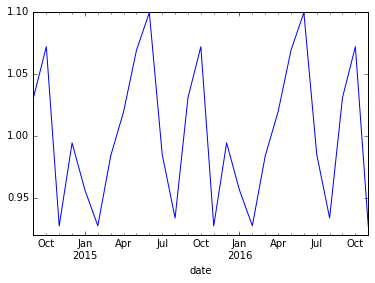

In [349]:
resul = seasonal_decompose(df_seasonal.query('APMC == "Mumbai"').groupby("date").sum().modal_price, model='multiplicative', freq=12)
print("Seasonality: ",resul.seasonal.plot())

('Residual: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7f5c169b0490>)


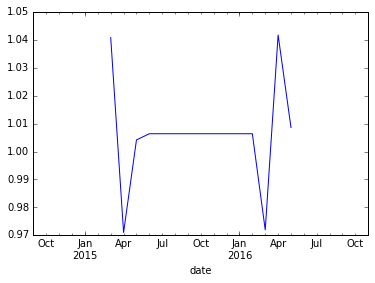

In [350]:
print("Residual: ", resul.resid.plot())

('Trend: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7f5c16657e90>)


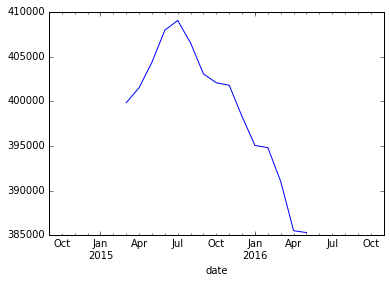

In [351]:
 print("Trend: ", resul.trend.plot())

('Deseasonality: ', <matplotlib.axes._subplots.AxesSubplot object at 0x7f5c16a808d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f5c16a808d0>)


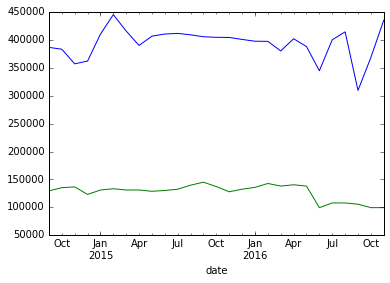

In [353]:
resi= result.observed-result.seasonal #for multiplicative seasonality  for multiplicative '-' in between
print("Deseasonality: ",resi.plot(), res.plot())

# TASK 4

In [355]:
df_mon.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,district_name,state_name,Type,msprice
date,,,,,,,,,,,,
2015-04-01,Ahmednagar,bajri,2015,April,79.0,1406.0,1538.0,1463.0,Ahmadnagar,Maharashtra,Kharif Crops,1275.0
2015-04-01,Akole,bajri,2015,April,52.0,1357.0,1800.0,1525.0,Ahmadnagar,Maharashtra,Kharif Crops,1275.0
2015-04-01,Jamkhed,bajri,2015,April,164.0,1304.0,1446.0,1375.0,Ahmadnagar,Maharashtra,Kharif Crops,1275.0
2015-04-01,Kopargaon,bajri,2015,April,354.0,1164.0,1469.0,1401.0,Ahmadnagar,Maharashtra,Kharif Crops,1275.0
2015-04-01,Newasa,bajri,2015,April,32.0,1282.0,1293.0,1286.0,Ahmadnagar,Maharashtra,Kharif Crops,1275.0


In [365]:
dfinal['fluc']=dfinal['max_price']-dfinal['min_price']
dfinal['percentfluc']= (dfinal['fluc']*1.0/dfinal['min_price'])*100

In [366]:
dfinal.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,district_name,state_name,Type,msprice,fluc,percentfluc
date,,,,,,,,,,,,,,
2015-04-01,Ahmednagar,bajri,2015,April,79.0,1406.0,1538.0,1463.0,Ahmadnagar,Maharashtra,Kharif Crops,1275.0,132.0,9.388336
2015-04-01,Akole,bajri,2015,April,52.0,1357.0,1800.0,1525.0,Ahmadnagar,Maharashtra,Kharif Crops,1275.0,443.0,32.645542
2015-04-01,Jamkhed,bajri,2015,April,164.0,1304.0,1446.0,1375.0,Ahmadnagar,Maharashtra,Kharif Crops,1275.0,142.0,10.889571
2015-04-01,Kopargaon,bajri,2015,April,354.0,1164.0,1469.0,1401.0,Ahmadnagar,Maharashtra,Kharif Crops,1275.0,305.0,26.202749
2015-04-01,Newasa,bajri,2015,April,32.0,1282.0,1293.0,1286.0,Ahmadnagar,Maharashtra,Kharif Crops,1275.0,11.0,0.858034


In [380]:
df = dfinal.groupby(['Year']).apply(pd.DataFrame.sort_values, 'percentfluc', ascending=False)
df.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price,msprice,fluc,percentfluc
count,60323.000000,6.032300e+04,6.032300e+04,60323.000000,60323.000000,60323.000000,6.032300e+04,6.031500e+04
mean,2015.343186,5.979891e+03,2.917313e+03,3610.827346,3253.333090,2307.114404,6.935140e+02,inf
std,0.687594,3.424404e+04,1.338603e+04,4112.467709,3484.555751,759.745651,1.317216e+04,NaN
min,2014.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,230.000000,-3.149973e+06,-1.000000e+02
25%,2015.000000,3.900000e+01,1.238000e+03,1590.000000,1445.000000,2210.015680,1.490000e+02,6.310766e+00
50%,2015.000000,2.160000e+02,1.928000e+03,2756.000000,2388.000000,2315.827423,3.810000e+02,1.810478e+01
75%,2016.000000,1.374000e+03,3.882000e+03,4600.000000,4230.000000,2325.196664,8.520000e+02,4.924718e+01
max,2016.000000,1.450254e+06,3.153038e+06,174375.000000,142344.000000,4800.000000,7.000000e+04,inf


In [381]:
df.tail(20)   

APMC   Commodity  Year      Month  \
Year date                                                       
2016 2016-01-01   Sillod-Bharadi  green gram  2016    January   
     2016-02-01         Vaijapur  green gram  2016   February   
     2016-01-01           Shirur      cowpea  2016    January   
     2016-01-01  Indapur-Bhigwan      cowpea  2016    January   
     2016-01-01          Indapur      cowpea  2016    January   
     2016-11-01          Solapur     soybean  2016   November   
     2016-02-01  Indapur-Bhigwan      cowpea  2016   February   
     2016-02-01          Indapur      cowpea  2016   February   
     2016-08-01           Shirur      cowpea  2016     August   
     2016-11-01           Ramtek     soybean  2016   November   
     2016-11-01         Akkolkot       bajri  2016   November   
     2016-01-01         Vaijapur  green gram  2016    January   
     2016-10-01           Devala      cowpea  2016    October   
     2016-05-01           Devala      cowpea  2016        May   
     2016-03-01           Devala      cowpea  2016      March   
     2016-06-01           Devala      cowpea  2016       June   
     2016-02-01           Devala      cowpea  2016   February   
     2016-11-01         Kurdwadi       bajri  2016   November   
     2016-09-01          Shahada      cowpea  2016  September   
     2016-08-01           Satana  horse gram  2016     August   

                 arrivals_in_qtl  min_price  max_price  modal_price  \
Year date                                                             
2016 2016-01-01              5.0     6501.0     6501.0       6501.0   
     2016-02-01              5.0     5620.0     5620.0       5620.0   
     2016-01-01              1.0     4500.0     4500.0       4500.0   
     2016-01-01              2.0     4251.0     4251.0       4251.0   
     2016-01-01              6.0     3051.0     3051.0       3051.0   
     2016-11-01             71.0     2790.0     2790.0       2790.0   
     2016-02-01              2.0     3176.0     3176.0       3176.0   
     2016-02-01              1.0     3100.0     3100.0       3100.0   
     2016-08-01              1.0     5300.0     5300.0       5300.0   
     2016-11-01             65.0     2635.0     2635.0       2635.0   
     2016-11-01             67.0     1438.0     1438.0       1438.0   
     2016-01-01             15.0     6196.0     6196.0       6196.0   
     2016-10-01              1.0     2465.0     2465.0       2465.0   
     2016-05-01              2.0     3555.0     3555.0       3555.0   
     2016-03-01              2.0     3350.0     3350.0       3350.0   
     2016-06-01              3.0     3925.0     3925.0       3925.0   
     2016-02-01              1.0     3205.0     3205.0       3205.0   
     2016-11-01              6.0     1421.0     1421.0       1421.0   
     2016-09-01              3.0     5167.0     5167.0       5167.0   
     2016-08-01              1.0     2011.0     2011.0       2011.0   

                district_name   state_name          Type      msprice  fluc  \
Year date                                                                     
2016 2016-01-01    Aurangabad  Maharashtra  Kharif Crops  2325.196664   0.0   
     2016-02-01    Aurangabad  Maharashtra  Kharif Crops  2325.196664   0.0   
     2016-01-01          Pune  Maharashtra  Kharif Crops  2325.196664   0.0   
     2016-01-01          Pune  Maharashtra  Kharif Crops  2325.196664   0.0   
     2016-01-01          Pune  Maharashtra  Kharif Crops  2325.196664   0.0   
     2016-11-01       Solapur  Maharashtra  Kharif Crops  2325.196664   0.0   
     2016-02-01          Pune  Maharashtra  Kharif Crops  2325.196664   0.0   
     2016-02-01          Pune  Maharashtra  Kharif Crops  2325.196664   0.0   
     2016-08-01          Pune  Maharashtra  Kharif Crops  2325.196664   0.0   
     2016-11-01        Nagpur  Maharashtra  Kharif Crops  2325.196664   0.0   
     2016-11-01       Solapur  Maharashtra  Kharif Crops  1330.000000   0.0   
     20